In [148]:
%load_ext autoreload
%autoreload 2


from util import *
#from myalgorithm import algorithm
#from myalgorithm import algorithm
#from myalgorithm import algorithm
#from please import algorithm
#from reget import algorithm
from tabu import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# import json
# import numpy as np
# import time
# import pandas as pd

# def load_problem(file_name):
#     with open(file_name, 'r') as f:
#         prob = json.load(f)
#     return prob

# def initialize_orders_and_riders(prob):
#     K = prob['K']
#     ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
#     ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]
#     DIST = np.array(prob['DIST'])
#     for r in ALL_RIDERS:
#         r.T = np.round(DIST / r.speed + r.service_time)
#     return K, ALL_ORDERS, ALL_RIDERS, DIST

# def main():
#     timelimit = 60

#     results = []
#     summary_data = {'problem_file': [], 'avg_cost': [], 'feasible': [], 'time': []}

#     for i in range(1, 19):
#         problem_file = f'STAGE1_{i}.json'
        
#         prob = load_problem(problem_file)
#         K, ALL_ORDERS, ALL_RIDERS, DIST = initialize_orders_and_riders(prob)
        
#         alg_start_time = time.time()

#         exception = None
#         solution = None
#         try:
#             # Run algorithm!
#             solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
#         except Exception as e:
#             exception = f'{e}'

#         alg_end_time = time.time()

#         prob = load_problem(problem_file)
#         K, ALL_ORDERS, ALL_RIDERS, DIST = initialize_orders_and_riders(prob)

#         checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

#         checked_solution['time'] = alg_end_time - alg_start_time
#         checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
#         checked_solution['exception'] = exception

#         checked_solution['prob_name'] = prob['name']
#         checked_solution['prob_file'] = problem_file

#         results.append(checked_solution)
        
#         # Summary data collection
#         summary_data['problem_file'].append(problem_file)
#         summary_data['avg_cost'].append(checked_solution.get('avg_cost', None))
#         summary_data['feasible'].append(checked_solution.get('feasible', None))
#         summary_data['time'].append(checked_solution.get('time', None))

#         print(f"Processed {problem_file}")
#         print(checked_solution)

#     # Create DataFrame for summary data
#     summary_df = pd.DataFrame(summary_data)
#     summary_df.to_csv('solution_summary.csv', index=False)

#     return results

# if __name__ == "__main__":
#     results = main()
#     # results에 원하는 처리를 추가할 수 있습니다.



In [150]:

problem_file = 'STAGE1_17.json'
# problem_file = "TEST_K50_1.json"
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
     solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Objective value from process: 3908.141666666667
Objective value from process: 3952.866666666667
Objective value from process: 3828.8696666666665
Objective value from process: 4001.0833333333317
Objective value from process: 3908.314333333333
Objective value from process: 3920.149
Objective value from process: 3848.1883333333335
Objective value from process: 4038.568666666666
Objective value from process: 3799.596666666666
Objective value from process: 3902.940333333333
Objective value from process: 4512.753333333333
Objective value from process: 4499.2
Objective value from process: 4533.223333333333
Objective value from process: 3827.8879999999995
Objective value from process: 3890.658
Objective value from process: 3993.46
Objective value from process: 3908.782333333334
Objective value from process: 3802.717333333333
Objective value from process: 3877.238666666667
Objective value from process: 3975.698666666667
Objective value from process: 3935.271333333333
Objective value from proces

{'total_cost': 1129228.0,
 'avg_cost': 3764.0933333333332,
 'num_drivers': 124,
 'total_dist': 666216,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [64, 43, 12], [43, 12, 64]],
  ['BIKE', [102, 213, 187], [102, 187, 213]],
  ['BIKE', [80, 160, 97], [80, 97, 160]],
  ['BIKE', [230, 204, 162], [230, 204, 162]],
  ['BIKE', [146, 174, 221], [221, 174, 146]],
  ['BIKE', [161, 135, 239, 198], [135, 239, 198, 161]],
  ['BIKE', [86, 121, 110, 178], [121, 110, 178, 86]],
  ['BIKE', [37, 1, 92], [1, 92, 37]],
  ['BIKE', [186, 259, 268, 202], [202, 268, 186, 259]],
  ['BIKE', [5, 57, 6, 50], [5, 6, 57, 50]],
  ['BIKE', [132, 211, 238, 227], [211, 132, 238, 227]],
  ['BIKE', [42, 54, 39, 118], [42, 118, 39, 54]],
  ['BIKE', [104, 184, 237], [104, 184, 237]],
  ['BIKE', [58], [58]],
  ['BIKE', [84, 150, 226], [226, 150, 84]],
  ['BIKE', [189, 234, 284, 287], [189, 287, 284, 234]],
  ['BIKE', [123, 248, 188, 232], [123, 248, 232, 188]],
  ['BIKE', [274, 279, 219], [219, 274, 279]

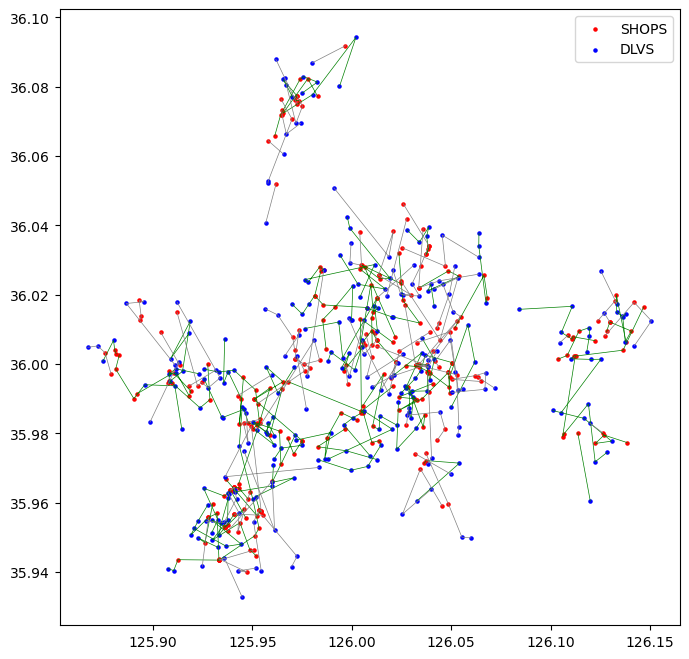

In [151]:
draw_route_solution(ALL_ORDERS, checked_solution)

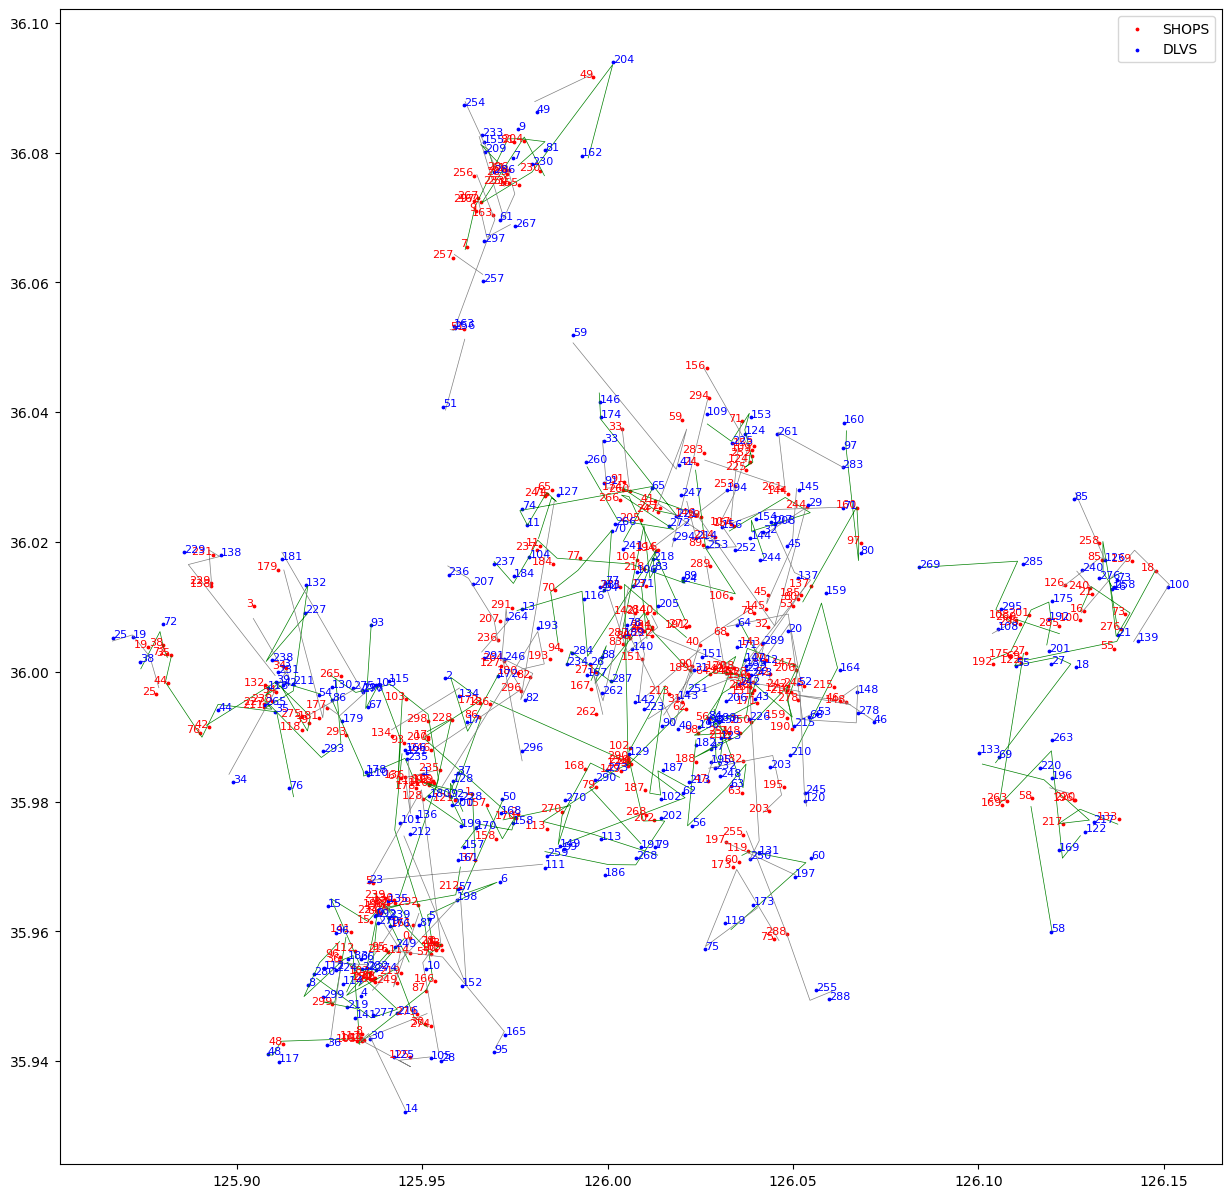

In [152]:
import matplotlib.pyplot as plt
import numpy as np

def draw_route_solution(all_orders, solution):
    
    plt.subplots(figsize=(15, 15))
    node_size = 3
    noise_scale = 0.001  # 좌표에 추가할 노이즈의 크기

    # 상점 위치 표시
    shop_x = [order.shop_lon + np.random.uniform(-noise_scale, noise_scale) for order in all_orders]
    shop_y = [order.shop_lat + np.random.uniform(-noise_scale, noise_scale) for order in all_orders]
    plt.scatter(shop_x, shop_y, c='red', s=node_size, label='SHOPS')

    # 주문 인덱스 상점 위치에 표시
    for i, (x, y) in enumerate(zip(shop_x, shop_y)):
        plt.text(x, y, str(i), fontsize=8, ha='right', color='red')

    # 배달 위치 표시
    dlv_x = [order.dlv_lon + np.random.uniform(-noise_scale, noise_scale) for order in all_orders]
    dlv_y = [order.dlv_lat + np.random.uniform(-noise_scale, noise_scale) for order in all_orders]
    plt.scatter(dlv_x, dlv_y, c='blue', s=node_size, label='DLVS')

    # 주문 인덱스 배달 위치에 표시
    for i, (x, y) in enumerate(zip(dlv_x, dlv_y)):
        plt.text(x, y, str(i), fontsize=8, ha='left', color='blue')

    rider_idx = {
        'BIKE': 0,
        'CAR': 0,
        'WALK': 0
    }

    for bundle_info in solution['bundles']:
        rider_type = bundle_info[0]
        shop_seq = bundle_info[1]
        dlv_seq = bundle_info[2]

        rider_idx[rider_type] += 1

        route_color = 'gray'
        if rider_type == 'BIKE':
            route_color = 'green'
        elif rider_type == 'WALK':
            route_color = 'orange'

        route_x = []
        route_y = []
        for i in shop_seq:
            route_x.append(all_orders[i].shop_lon + np.random.uniform(-noise_scale, noise_scale))
            route_y.append(all_orders[i].shop_lat + np.random.uniform(-noise_scale, noise_scale))

        for i in dlv_seq:
            route_x.append(all_orders[i].dlv_lon + np.random.uniform(-noise_scale, noise_scale))
            route_y.append(all_orders[i].dlv_lat + np.random.uniform(-noise_scale, noise_scale))

        plt.plot(route_x, route_y, c=route_color, linewidth=0.5)

    plt.legend()
    plt.show()

# 예시로 함수 호출
draw_route_solution(ALL_ORDERS, checked_solution)


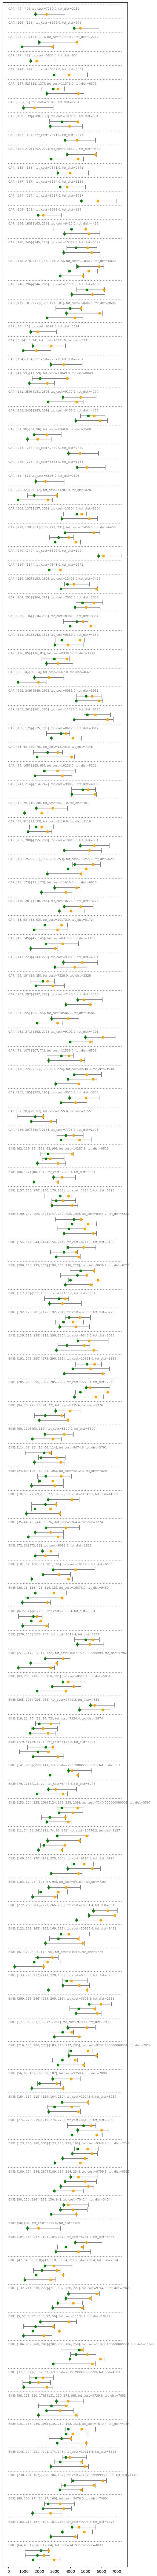

In [153]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)